# Chess data analysis

This dataset contains data from all rated games played in Lichess from January 2013 to December 2014. It includes names of the players, ratings, winner, opening, etc.

Content

WhiteElo: Elo of the player with white pieces
BlackElo: Elo of the player with black pieces
WhiteName: Name of the player with white pieces
BlackName: Name of the player with black pieces
Result: Score. If the game ended in Draw it shows it.
Termination: How the game ended, it can be: Normal, Time Forfeit, Abandon or Rules infraction.
- Normal: When the game end in checkmate, abandon or draw
- Time Forfeit: When one of the players runs out of time
- Abandon: When in a competition one of the players doesn't make a move
- Rules infraction: When one of the players is banned
TimeControl: Classification of the games based on the estimated duration of a game calculated as InitialTime+ 40*Increment. If estimated duration:
- <=29s: Ultrabullet
- <=179s: Bullet
- <=479s: Blitz
- <=1499s: Rapid
- Bigger or equal than 1500s: Classical
Opening: Opening Name

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/starburned/data_analytics_projects/data/chess_games.csv")

In [3]:
df.head()

,Event,White,Black,Result,UTCDate,UTCTime,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening,TimeControl,Termination,AN
0,Classical,eisaaaa,HAMID449,1-0,2016.06.30,22:00:01,1901,1896,11.0,-11.0,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...
1,Blitz,go4jas,Sergei1973,0-1,2016.06.30,22:00:01,1641,1627,-11.0,12.0,C20,King's Pawn Opening: 2.b3,300+0,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...
2,Blitz tournament,Evangelistaizac,kafune,1-0,2016.06.30,22:00:02,1647,1688,13.0,-13.0,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Bg4 4. Be2 Nf6 5....
3,Correspondence,Jvayne,Wsjvayne,1-0,2016.06.30,22:00:02,1706,1317,27.0,-25.0,A00,Van't Kruijs Opening,-,Normal,1. e3 Nf6 2. Bc4 d6 3. e4 e6 4. Nf3 Nxe4 5. Nd...
4,Blitz tournament,kyoday,BrettDale,0-1,2016.06.30,22:00:02,1945,1900,-14.0,13.0,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",180+0,Time forfeit,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...


In [4]:
df["Event"].value_counts()

 Blitz                    2339554
 Classical                1510798
 Bullet                   1198177
 Bullet tournament         546774
 Blitz tournament          472258
 Classical tournament      165633
 Correspondence             22939
Blitz                          20
Classical                      13
Bullet                          8
Blitz tournament                4
Bullet tournament               3
Classical tournament            2
Correspondence                  1
Name: Event, dtype: int64

In [6]:
df["Event"].value_counts(normalize=True).head(10)

 Blitz                    0.373959
 Classical                0.241489
 Bullet                   0.191519
 Bullet tournament        0.087397
 Blitz tournament         0.075487
 Classical tournament     0.026475
 Correspondence           0.003667
Blitz                     0.000003
Classical                 0.000002
Bullet                    0.000001
Name: Event, dtype: float64

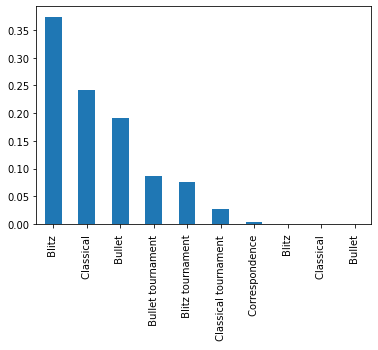

In [14]:
df["Event"].value_counts(normalize=True).head(10).plot(kind="bar");

In [23]:
df["Opening"].value_counts(normalize=True).head(10)

Van't Kruijs Opening                             0.021277
Scandinavian Defense: Mieses-Kotroc Variation    0.017939
Modern Defense                                   0.017282
Horwitz Defense                                  0.015257
Sicilian Defense                                 0.013690
French Defense: Knight Variation                 0.013350
Caro-Kann Defense                                0.013172
Scandinavian Defense                             0.012547
Owen Defense                                     0.011741
Sicilian Defense: Bowdler Attack                 0.011582
Name: Opening, dtype: float64

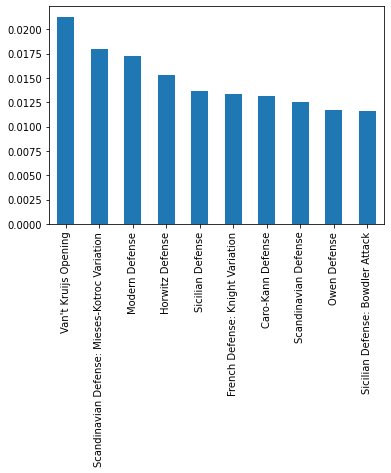

In [24]:
df["Opening"].value_counts(normalize=True).head(10).plot(kind="bar");

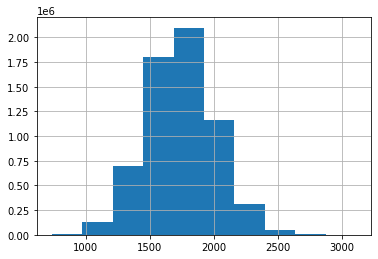

In [16]:
df["WhiteElo"].hist();

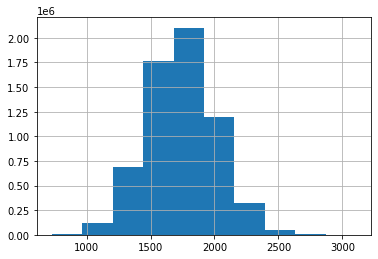

In [17]:
df["BlackElo"].hist();

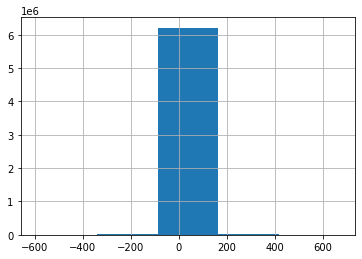

In [22]:
df["WhiteRatingDiff"].hist(bins=5);

In [25]:
df["WhiteEloBins"] = pd.cut(df["WhiteElo"],5)

In [26]:
df["WhiteEloBins"].value_counts()

(1686.2, 2160.8]     3261044
(1211.6, 1686.2]     2495314
(2160.8, 2635.4]      362871
(734.627, 1211.6]     133279
(2635.4, 3110.0]        3676
Name: WhiteEloBins, dtype: int64

In [32]:
pd.crosstab(df["WhiteEloBins"], df["Termination"], normalize="index")

Termination,Abandoned,Normal,Rules infraction,Time forfeit,Unterminated
WhiteEloBins,,,,,
"(734.627, 1211.6]",0.001351,0.674105,0.000045,0.324500,0.000000e+00
"(1211.6, 1686.2]",0.002118,0.691121,0.000025,0.306735,0.000000e+00
"(1686.2, 2160.8]",0.002603,0.667464,0.000017,0.329915,3.066503e-07
"(2160.8, 2635.4]",0.001852,0.652124,0.000006,0.346018,0.000000e+00
"(2635.4, 3110.0]",0.000544,0.657236,0.000000,0.342220,0.000000e+00


In [33]:
df["TimeControl"].value_counts()

300+0      1075140
180+0       948615
60+0        912781
600+0       580351
30+0        307065
            ...   
1020+14          1
45+60            1
9000+60          1
7200+90          1
720+25           1
Name: TimeControl, Length: 841, dtype: int64

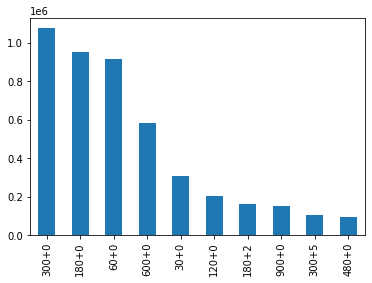

In [58]:
df["TimeControl"].value_counts().head(10).plot(kind="bar");

In [62]:
df["Result"].value_counts()

1-0        3113572
0-1        2902394
1/2-1/2     238875
*             1343
Name: Result, dtype: int64

In [63]:
df["Result"].value_counts(normalize=True)

1-0        0.497679
0-1        0.463924
1/2-1/2    0.038182
*          0.000215
Name: Result, dtype: float64

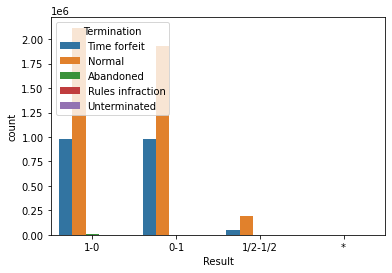

In [68]:
sns.countplot(data=df, x="Result", hue="Termination");

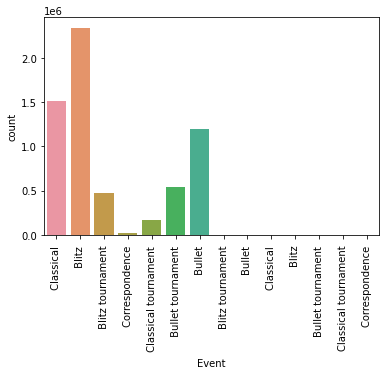

In [72]:
sns.countplot(data=df, x="Event")
plt.xticks(rotation=90);

In [73]:
df["White"].nunique()

118945

In [74]:
len(df)

6256184

In [75]:
df["Black"].nunique()

115946

In [76]:
df["White"].value_counts().head(10)

Beserking101         2872
decidement           2496
universe64           2493
behran64             2441
Nkko                 2379
Philipp_Stuttgart    2164
NOR_Hotshot          2014
vasiliyperedruk      1967
palang1359           1937
leko29               1915
Name: White, dtype: int64

In [77]:
df["Black"].value_counts().head(10)

Beserking101         2881
universe64           2514
decidement           2504
Nkko                 2348
behran64             2342
Philipp_Stuttgart    2181
vasiliyperedruk      1981
Serg_tourn           1941
CursoryGlance        1908
leko29               1900
Name: Black, dtype: int64

In [78]:
min(df["UTCDate"]), max(df["UTCDate"])

('2016.06.30', '2016.07.31')

In [81]:
df["Termination"].value_counts()

Normal              4230089
Time forfeit        2011336
Abandoned             14630
Rules infraction        128
Unterminated              1
Name: Termination, dtype: int64

In [82]:
fig=px.pie(df["Termination"].value_counts(),names=df["Termination"].value_counts().index,values=df["Termination"].value_counts().values,
           title="Distribution of Termination types",
            color_discrete_sequence=["#FDFEFE","#17202A"," #3498DB"],
           labels={"names":"Termination","values":"Num of Games"}
      )
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#283747",title_font_size=20,title_x=.45,font_color="#bbb",
    plot_bgcolor="#D0D3D4",legend_title_font_size=17,legend_title_font_color="#fff",
    legend_title_text="Termination type")
fig.update_yaxes(showgrid=False,visible=False,title="percent of commencts")
fig.update_xaxes(tickfont_size=9)
fig.update_traces(textfont_size=10)
fig.show()

In [86]:
fig=px.pie(df["Result"].value_counts(),names=df["Result"].value_counts().index,values=df["Result"].value_counts().values,
           title="Distribution of Chess Games results",
            color_discrete_sequence=["#FDFEFE","#17202A"," #3498DB"],
           labels={"names":"Result","values":"Num of Games"}
      )
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#283747",title_font_size=20,title_x=.45,font_color="#bbb",
    plot_bgcolor="#D0D3D4",legend_title_font_size=17,legend_title_font_color="#fff",
    legend_title_text="Result")
fig.update_yaxes(showgrid=False,visible=False,title="percent of commencts")
fig.update_xaxes(tickfont_size=9)
fig.update_traces(textfont_size=10)
fig.show()

In [87]:
opening=df["Opening"].value_counts().nlargest(5)
opening

Van't Kruijs Opening                             133112
Scandinavian Defense: Mieses-Kotroc Variation    112227
Modern Defense                                   108120
Horwitz Defense                                   95450
Sicilian Defense                                  85645
Name: Opening, dtype: int64

In [92]:
fig=px.bar(y=opening.index,x=opening.values,
           title="most used Oppenings".title(),
            color_discrete_sequence=["#21618C"],
           labels={"x":"Count ","y":"Opening "},
           text=opening.values
      )
fig.update_layout(
title_font_color="#fff",paper_bgcolor="#283747",title_font_size=20,title_x=.5,font_color="#bbb",
    plot_bgcolor="#F4F6F7",legend_title_font_size=17,legend_title_font_color="#fff",
    legend_title_text="Game winner")
fig.update_yaxes(showgrid=False,visible=True,title="Opening Moves",color="#fff")
fig.update_xaxes(showgrid=False,tickfont_size=9,visible=False)
fig.update_traces(textfont_size=10,textfont_color="#fff",textposition='inside')
fig.show()